In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

data = pd.read_csv('/kaggle/input/userchurn/train.csv')
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [2]:
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [3]:
data.loc[data['TotalSpent'] == ' ', 'TotalSpent'] = np.nan
data['TotalSpent'] = data['TotalSpent'].astype(np.float64, copy=False)

In [4]:
data[feature_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5273 non-null   float64
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [5]:
data[feature_cols].isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  9
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
dtype: int64

In [6]:
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.20,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.90,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570.00,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


array([[<Axes: title={'center': 'ClientPeriod'}>,
        <Axes: title={'center': 'MonthlySpending'}>],
       [<Axes: title={'center': 'TotalSpent'}>, <Axes: >]], dtype=object)

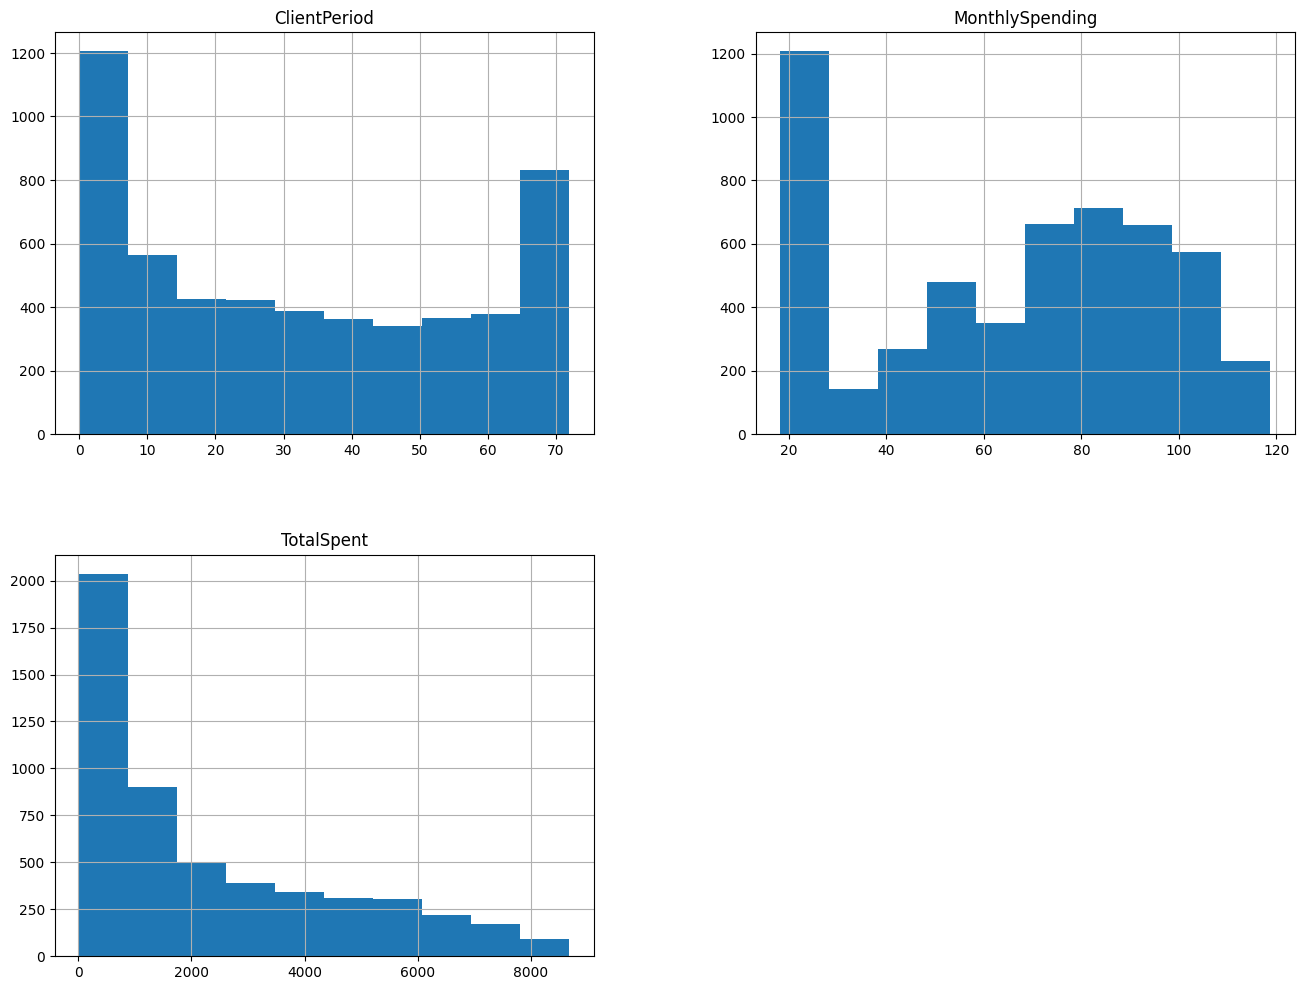

In [7]:
data[num_cols].hist(figsize=(16, 12))

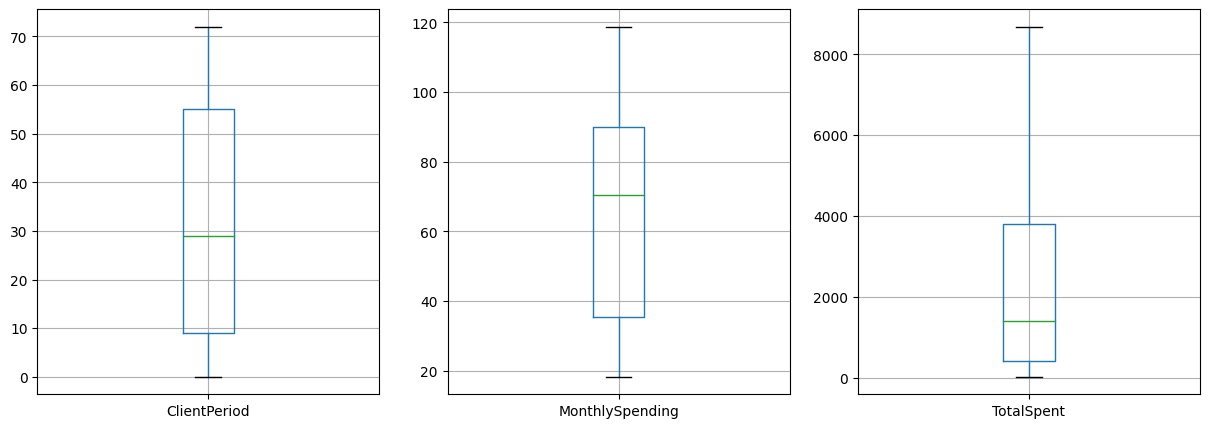

In [8]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for i, col in enumerate(num_cols):
    data.boxplot(column=col, ax=axs[i], showfliers=True)

plt.show()

In [9]:
import scipy.stats as stats
import seaborn as sns

def diagnostic_plots(col, title):
    fig = plt.figure(figsize=(10, 7))
    
    plt.subplot(2, 2, 1)
    col.hist(bins=30)

    plt.subplot(2, 2, 2)
    stats.probplot(col, dist="norm", plot=plt)

    plt.subplot(2, 2, 3)
    sns.violinplot(x=col)

    plt.subplot(2, 2, 4)
    sns.boxplot(x=col)
    fig.suptitle(title)
    plt.show()


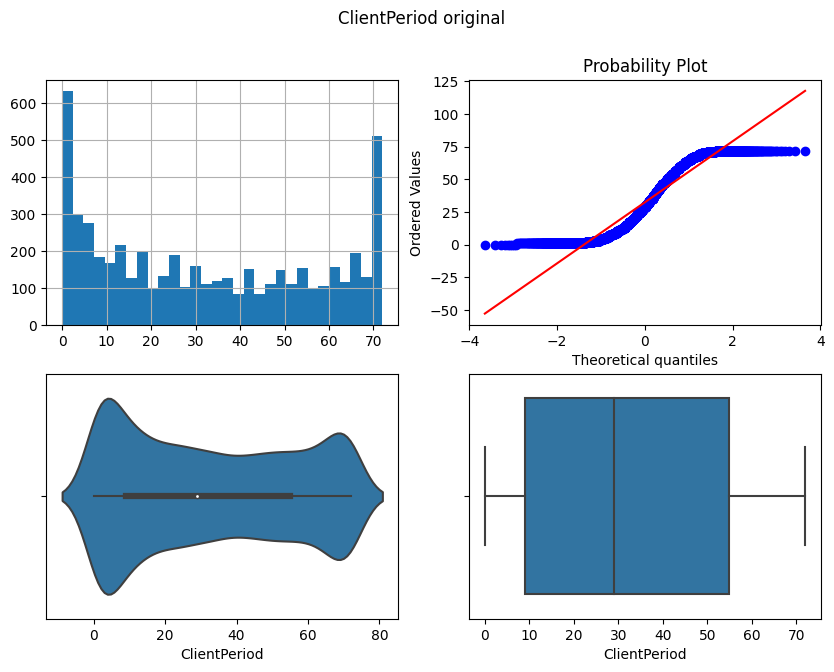

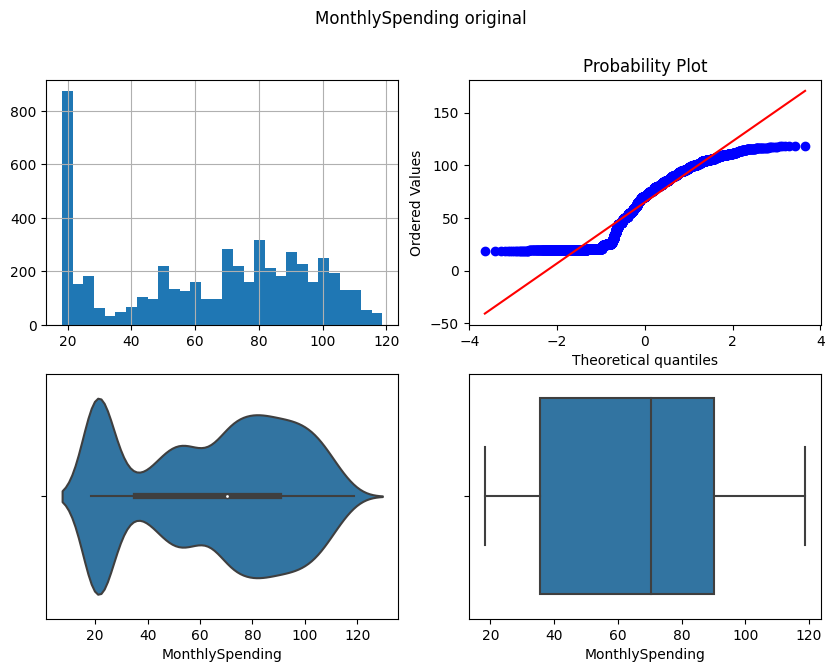

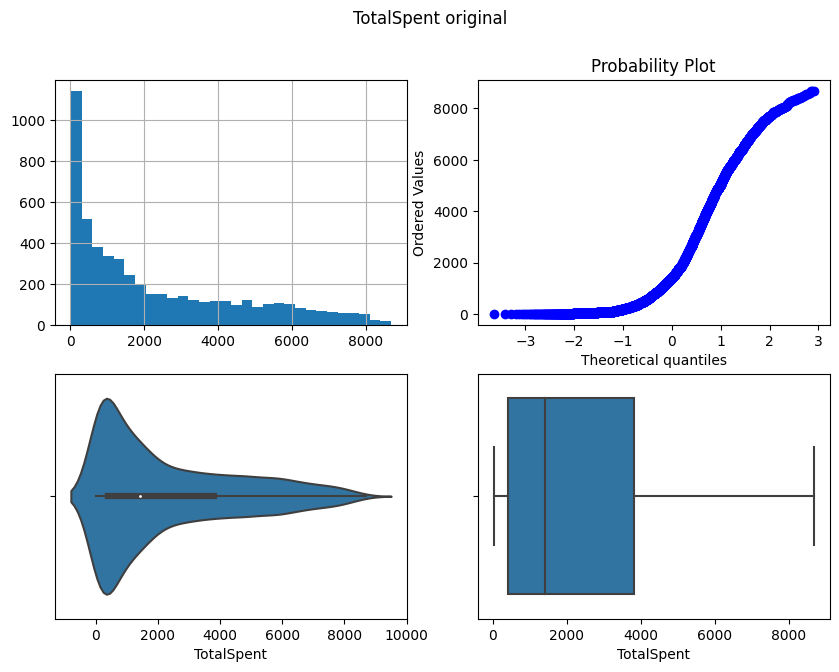

In [10]:
for num_col in num_cols:
    diagnostic_plots(data[num_col], f'{num_col} original')

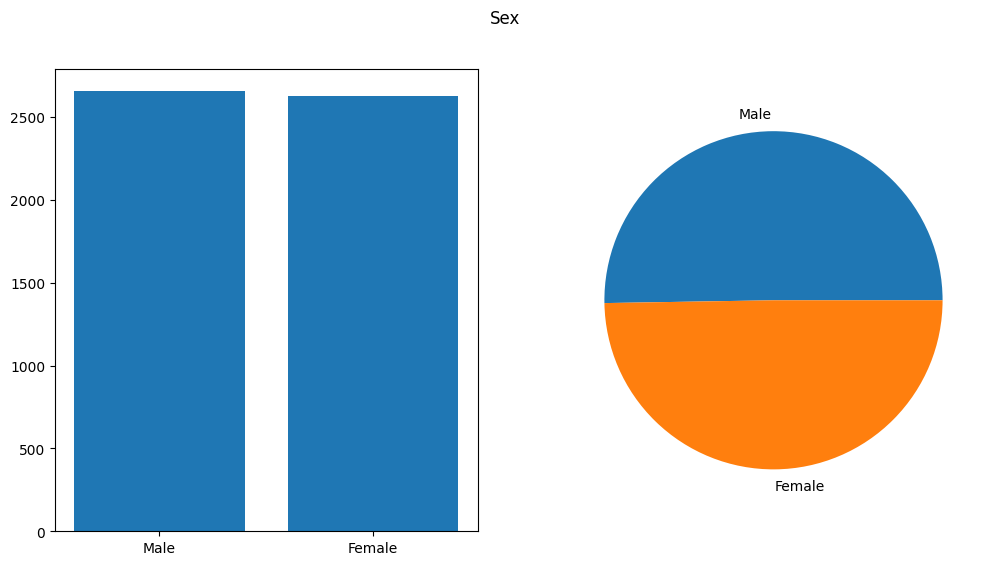

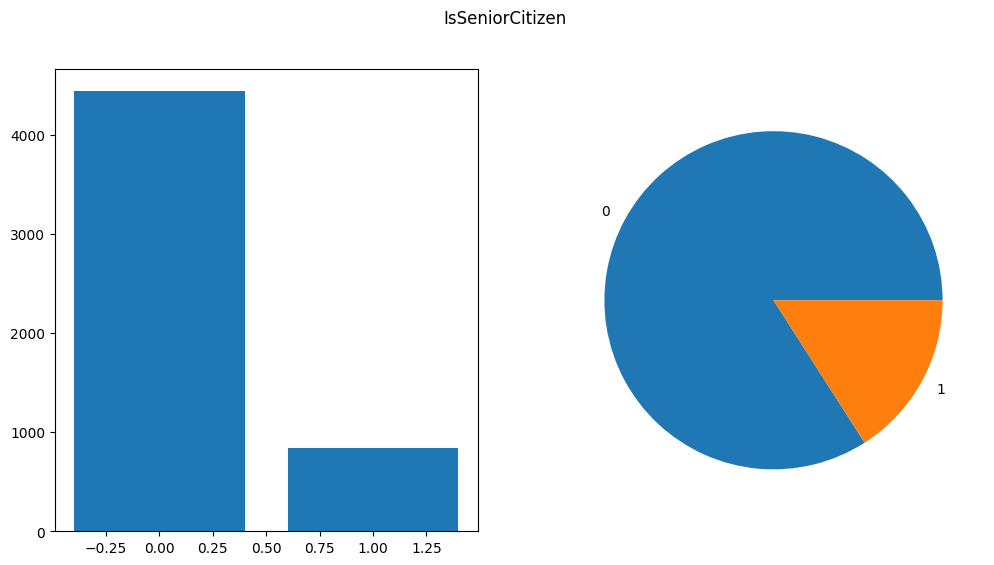

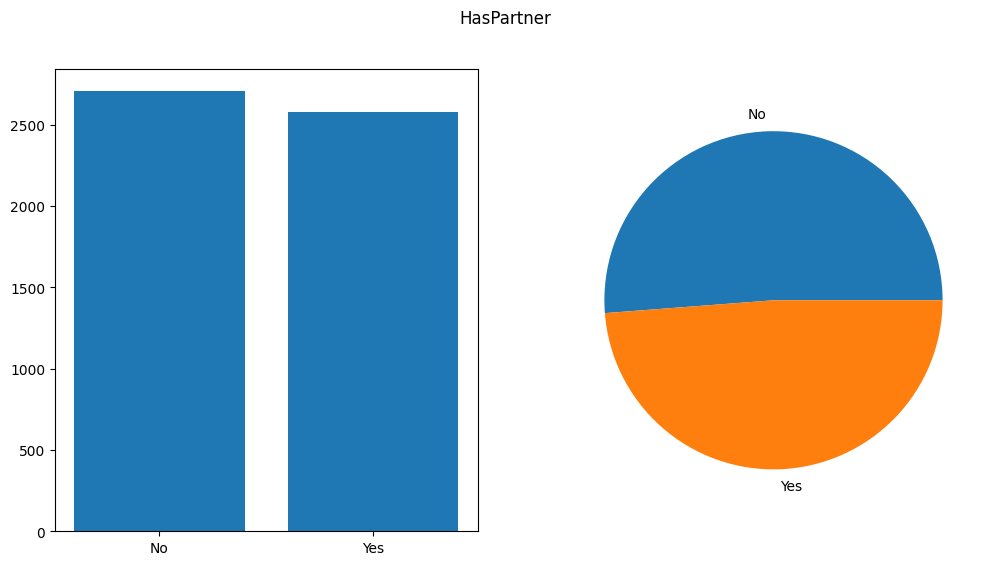

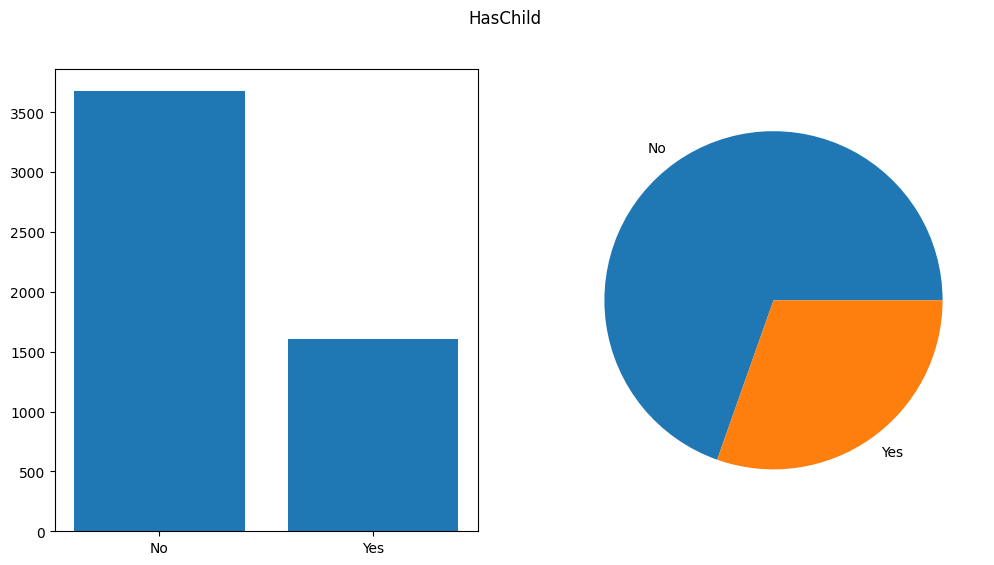

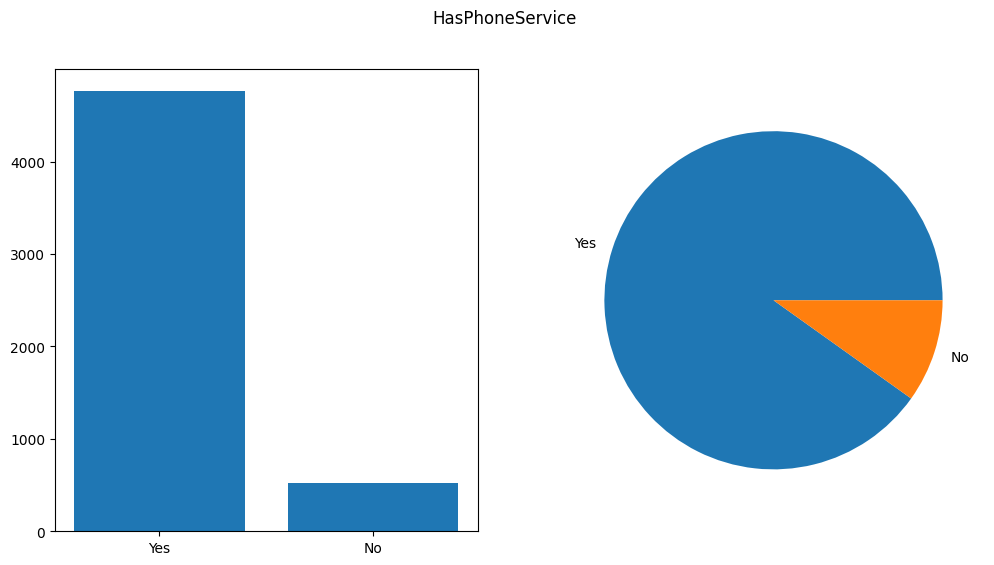

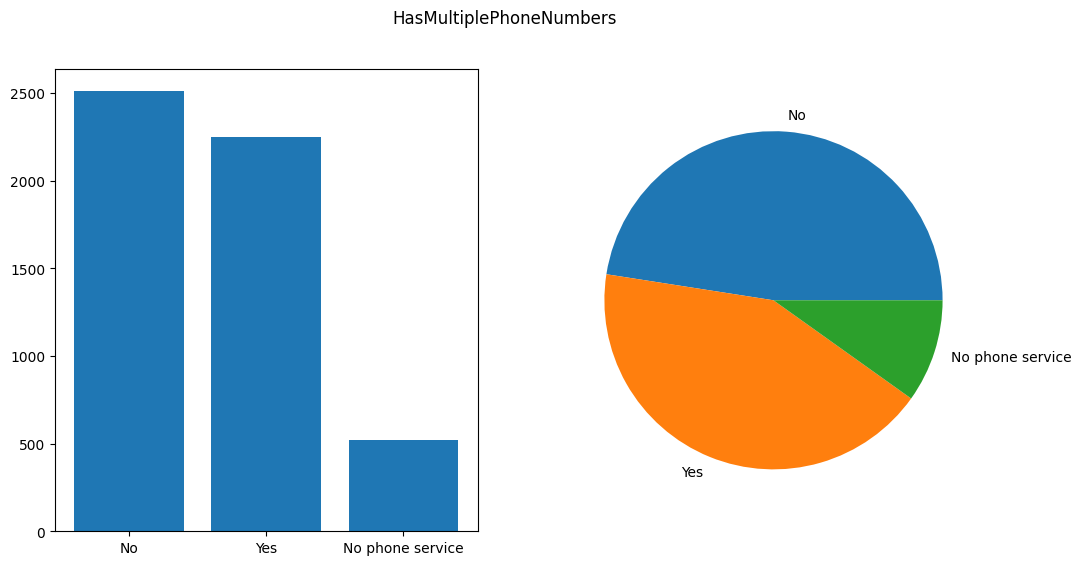

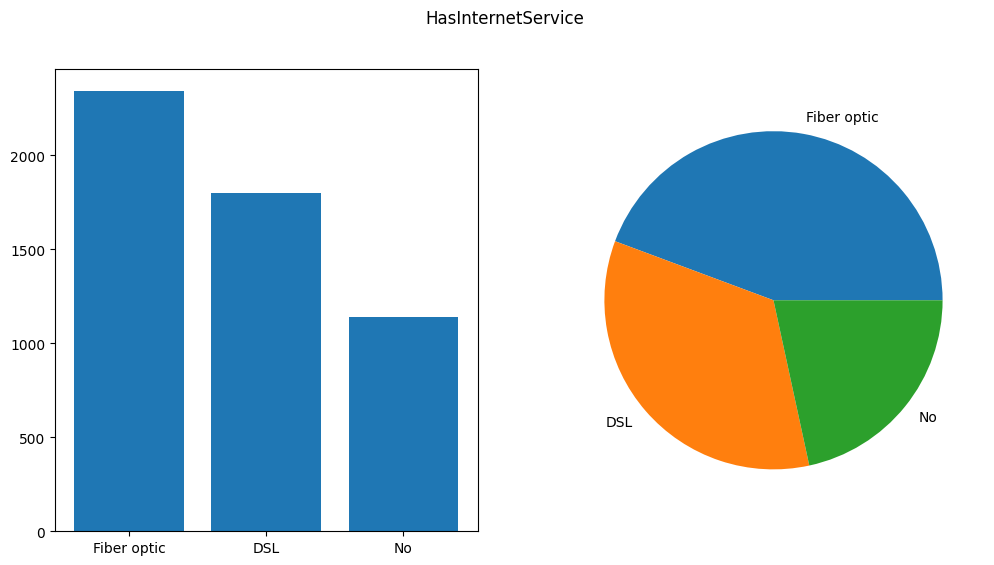

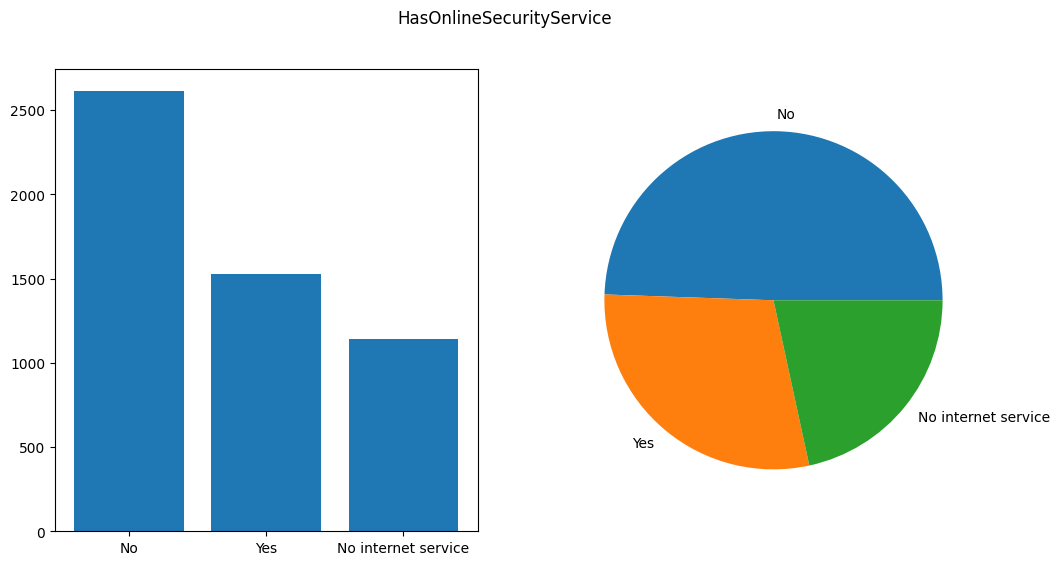

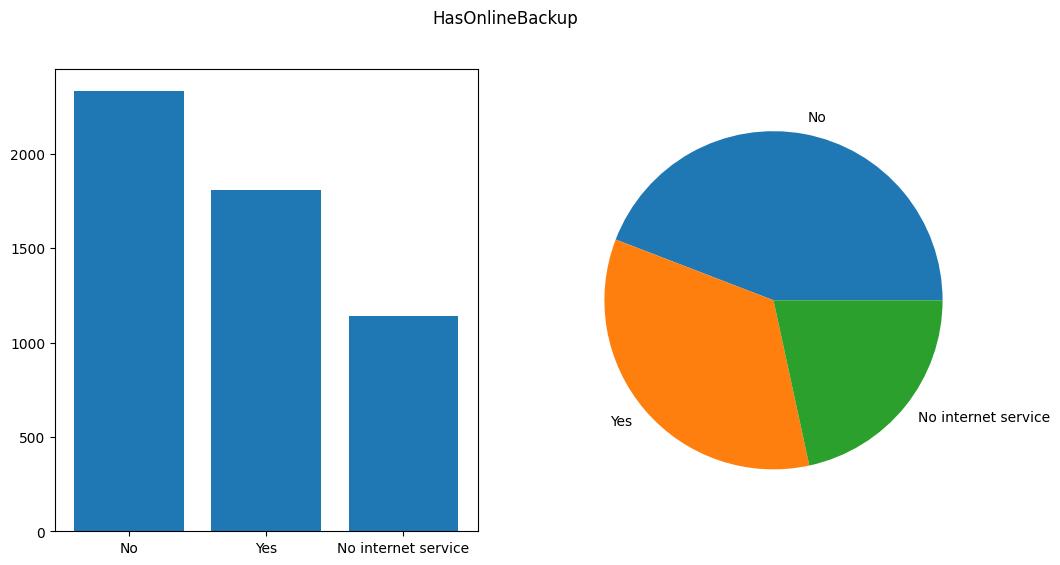

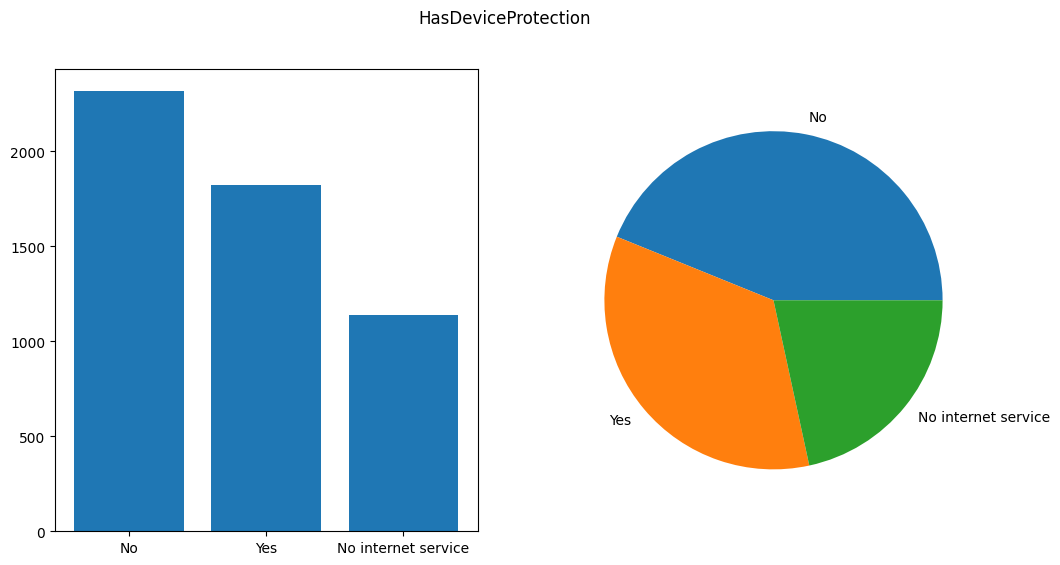

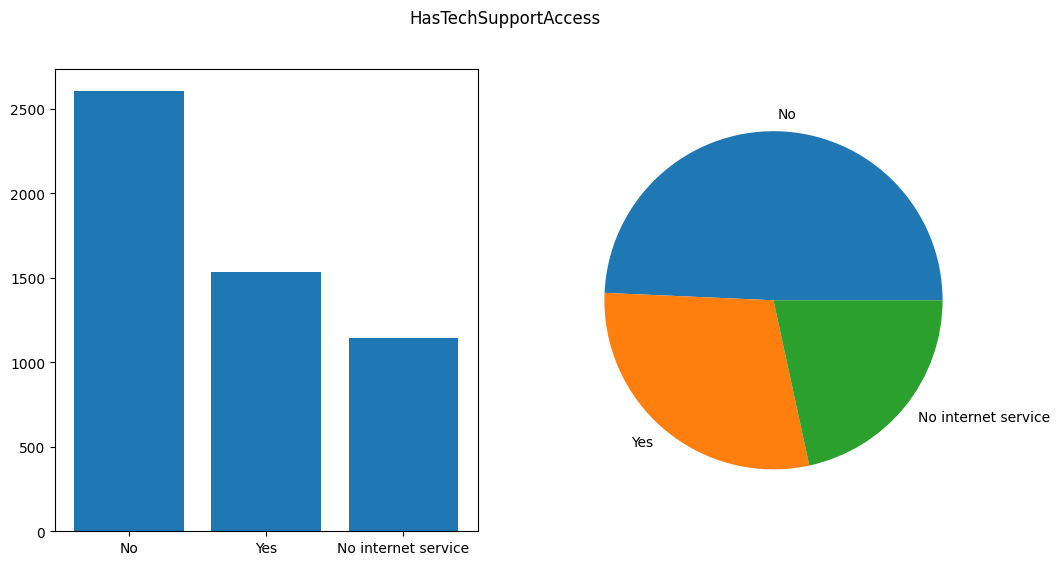

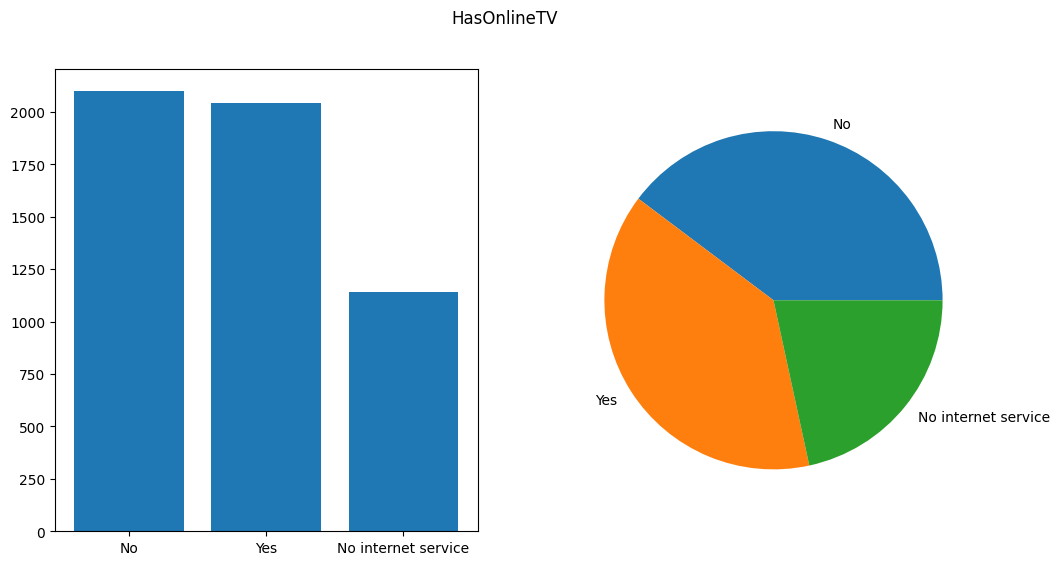

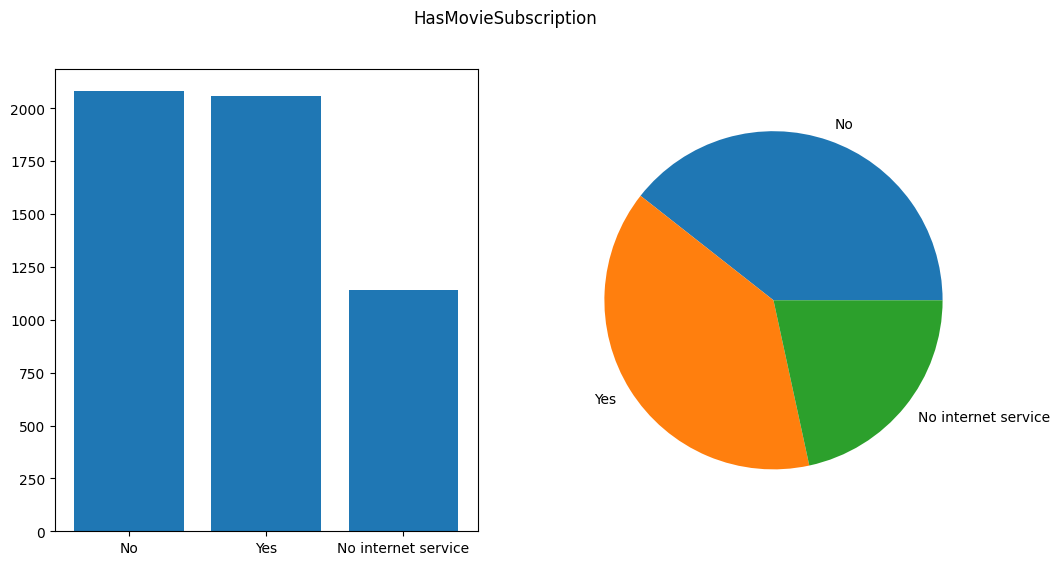

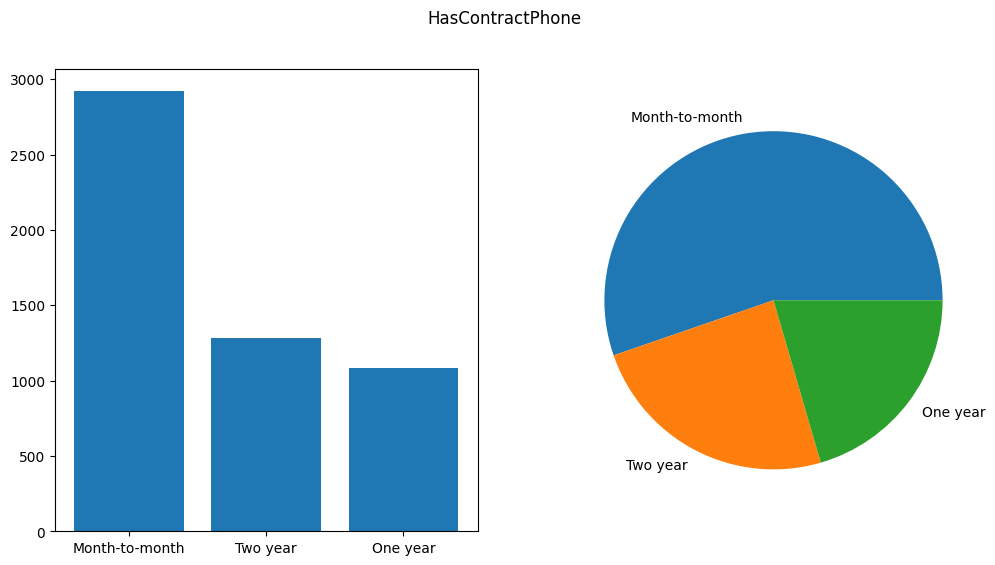

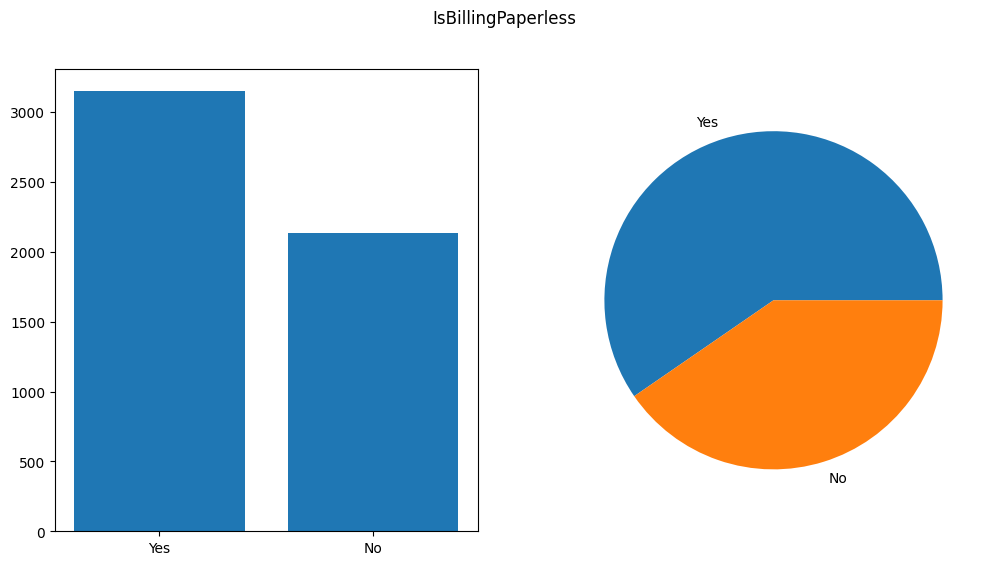

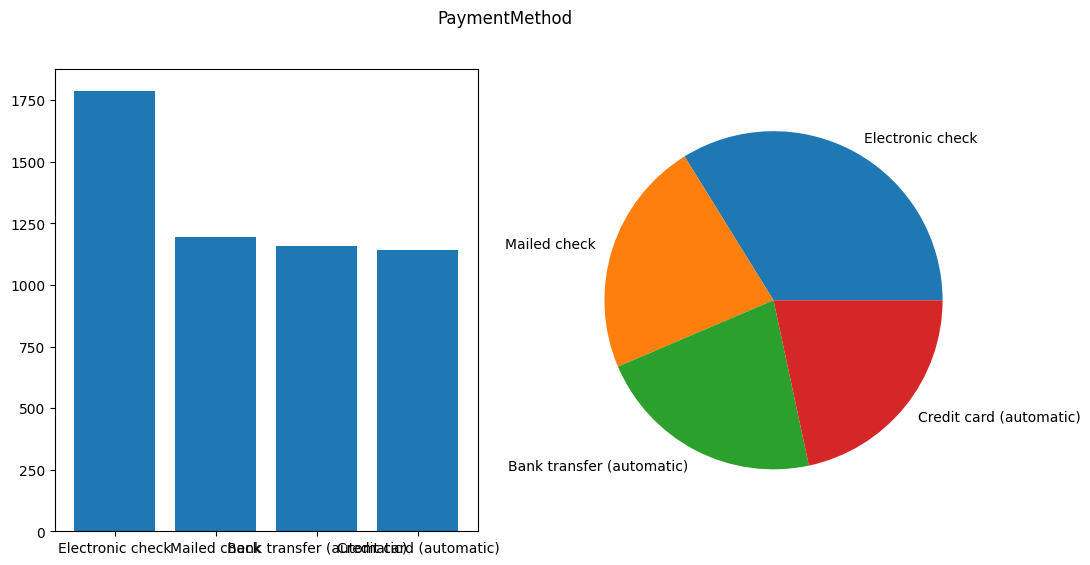

In [11]:
for i, col in enumerate(cat_cols):
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    value_count = data[col].value_counts()
    axs[0].bar(value_count.index, value_count.values)
    axs[1].pie(value_count.values, labels=value_count.index)
    fig.suptitle(col)
    plt.show()

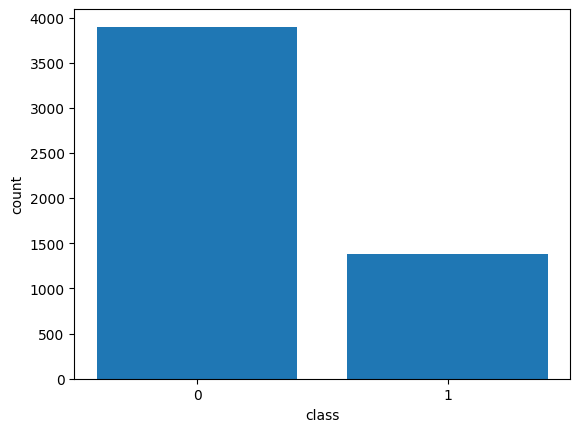

In [12]:
target_value_count = data[target_col].value_counts()
plt.plot()
plt.bar(target_value_count.index.astype(str), target_value_count.values)
plt.xlabel('class')
plt.ylabel('count')
plt.show()

In [13]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV

y = data[target_col]
data = data.drop(columns=[target_col])

data_train, data_valid, y_train, y_valid = train_test_split(data, y, train_size=0.7)

In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer

num_cols.remove('TotalSpent')

one_hot_enc_cols = [
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'PaymentMethod'
]

ordinal_enc_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'IsBillingPaperless',
]

num_transformer_lr = make_pipeline(
    SimpleImputer(
        strategy='median'
    ),
    StandardScaler()
)

replace_empty_lr = make_pipeline(
    FunctionTransformer(lambda X: X.replace(' ', np.nan)),
    FunctionTransformer(lambda X: X.astype(np.float64, copy=False)),
    num_transformer_lr
)

column_transformer_lr = ColumnTransformer(
    [
        (
            'replace_empty',
            replace_empty_lr,
            ['TotalSpent'],
        ),
        (
            'num_transformer',
            num_transformer_lr,
            num_cols
        ),   
        (
            'one_hot_enc',
            OneHotEncoder(handle_unknown='ignore', sparse_output=False),
            one_hot_enc_cols
        ),
        (
            'ordinal_enc',
            OrdinalEncoder(),
            ordinal_enc_cols
        )
    ]
)

alg_lr = Pipeline(
    steps=[
        (
            'column_transfor',
            column_transformer_lr
        ),
        (
            'logistic_regression',
            LogisticRegression()
        )
    ]
)

alg_lr

Pipeline(steps=[('column_transfor',
                 ColumnTransformer(transformers=[('replace_empty',
                                                  Pipeline(steps=[('functiontransformer-1',
                                                                   FunctionTransformer(func=<function <lambda> at 0x7ba737405360>)),
                                                                  ('functiontransformer-2',
                                                                   FunctionTransformer(func=<function <lambda> at 0x7ba7375c3be0>)),
                                                                  ('pipeline',
                                                                   Pipeline(steps=[('simpleimputer',
                                                                                    SimpleImputer(strategy='median'...
                                                   'HasInternetService',
                                                   'HasOnlineSecurityService',
                                                   'HasOnlineBackup',
                                                   'HasDeviceProtection',
                                                   'HasTechSupportAccess',
                                                   'HasOnlineTV',
                                                   'HasMovieSubscription',
                                                   'HasContractPhone',
                                                   'PaymentMethod']),
                                                 ('ordinal_enc',
                                                  OrdinalEncoder(),
                                                  ['Sex', 'IsSeniorCitizen',
                                                   'HasPartner', 'HasChild',
                                                   'HasPhoneService',
                                                   'IsBillingPaperless'])])),
                ('logistic_regression', LogisticRegression())])

In [15]:
from sklearn.model_selection import GridSearchCV

grid_lr = {
    'logistic_regression__C': [100, 10, 1, 0.1, 0.01, 0.001]
}

grid_search_lr = GridSearchCV(
    alg_lr, 
    grid_lr,
    cv=5,
    verbose=0,
    n_jobs=-1,
    scoring='roc_auc'
)

grid_search_lr.fit(data_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('column_transfor',
                                        ColumnTransformer(transformers=[('replace_empty',
                                                                         Pipeline(steps=[('functiontransformer-1',
                                                                                          FunctionTransformer(func=<function <lambda> at 0x7ba737405360>)),
                                                                                         ('functiontransformer-2',
                                                                                          FunctionTransformer(func=<function <lambda> at 0x7ba7375c3be0>)),
                                                                                         ('pipeline',
                                                                                          Pipeline(steps=[('simpleimputer',
                                                                                                           Sim...
                                                                          'HasTechSupportAccess',
                                                                          'HasOnlineTV',
                                                                          'HasMovieSubscription',
                                                                          'HasContractPhone',
                                                                          'PaymentMethod']),
                                                                        ('ordinal_enc',
                                                                         OrdinalEncoder(),
                                                                         ['Sex',
                                                                          'IsSeniorCitizen',
                                                                          'HasPartner',
                                                                          'HasChild',
                                                                          'HasPhoneService',
                                                                          'IsBillingPaperless'])])),
                                       ('logistic_regression',
                                        LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logistic_regression__C': [100, 10, 1, 0.1, 0.01,
                                                    0.001]},
             scoring='roc_auc')

In [16]:
from sklearn.metrics import roc_auc_score

predict_proba_train_lr = grid_search_lr.predict_proba(data_train)[:, 1]
predict_proba_valid_lr = grid_search_lr.predict_proba(data_valid)[:, 1]

roc_auc_train_lr = roc_auc_score(y_train, predict_proba_train_lr)
roc_auc_valid_lr = roc_auc_score(y_valid, predict_proba_valid_lr)

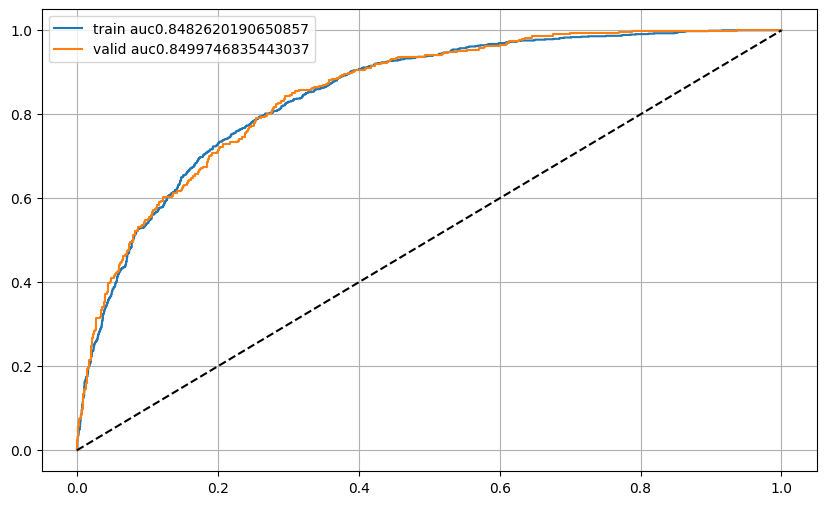

In [17]:
from sklearn.metrics import roc_curve

plt.figure(figsize=(10, 6))
plt.plot(*roc_curve(y_train, predict_proba_train_lr)[:2], label=f'train auc{roc_auc_train_lr}')
plt.plot(*roc_curve(y_valid, predict_proba_valid_lr)[:2], label=f'valid auc{roc_auc_valid_lr}')
plt.plot([0, 1], [0, 1], '--', color='black')

plt.grid()
plt.legend()
plt.show()

In [18]:
roc_auc_valid_lr, grid_search_lr.best_params_

(0.8499746835443037, {'logistic_regression__C': 10})

In [19]:
from catboost import CatBoostClassifier

num_transformer_cb = make_pipeline(
    SimpleImputer(
        strategy='median'
    ),
)

replace_empty_cb = make_pipeline(
    FunctionTransformer(lambda X: X.replace(' ', np.nan)),
    FunctionTransformer(lambda X: X.astype(np.float64, copy=False)),
    num_transformer_cb
)

column_transformer_cb = ColumnTransformer(
    [
        (
            'replace_empty',
            replace_empty_cb,
            ['TotalSpent'],
        ),
        (
            'num_transformer',
            num_transformer_cb,
            num_cols
        ),   
        (
            'one_hot_enc',
            OneHotEncoder(handle_unknown='ignore', sparse_output=False),
            one_hot_enc_cols
        ),
        (
            'ordinal_enc',
            OrdinalEncoder(),
            ordinal_enc_cols
        )
    ]
)

alg_cb = Pipeline(
    steps=[
        (
            'column_transformer',
            column_transformer_cb
        ),
        (
            'catboost',
            CatBoostClassifier()
        )
    ],
)

alg_cb

Pipeline(steps=[('column_transformer',
                 ColumnTransformer(transformers=[('replace_empty',
                                                  Pipeline(steps=[('functiontransformer-1',
                                                                   FunctionTransformer(func=<function <lambda> at 0x7ba73f3f6290>)),
                                                                  ('functiontransformer-2',
                                                                   FunctionTransformer(func=<function <lambda> at 0x7ba7372c3eb0>)),
                                                                  ('pipeline',
                                                                   Pipeline(steps=[('simpleimputer',
                                                                                    SimpleImputer(strategy='medi...
                                                   'HasOnlineSecurityService',
                                                   'HasOnlineBackup',
                                                   'HasDeviceProtection',
                                                   'HasTechSupportAccess',
                                                   'HasOnlineTV',
                                                   'HasMovieSubscription',
                                                   'HasContractPhone',
                                                   'PaymentMethod']),
                                                 ('ordinal_enc',
                                                  OrdinalEncoder(),
                                                  ['Sex', 'IsSeniorCitizen',
                                                   'HasPartner', 'HasChild',
                                                   'HasPhoneService',
                                                   'IsBillingPaperless'])])),
                ('catboost',
                 <catboost.core.CatBoostClassifier object at 0x7ba7376880d0>)])

In [20]:
from catboost import Pool

grid_cb = {
    'catboost__iterations': np.arange(30, 90, 10),
    'catboost__learning_rate': np.arange(0.01, 0.12, 0.01)
}

grid_search_cb = GridSearchCV(alg_cb, grid_cb, cv=3, n_jobs=-1, verbose=0, scoring='roc_auc')
grid_search_cb.fit(data_train, y_train)

0:	learn: 0.6863711	total: 66ms	remaining: 1.92s
1:	learn: 0.6793631	total: 71ms	remaining: 994ms
2:	learn: 0.6726618	total: 105ms	remaining: 945ms
3:	learn: 0.6668341	total: 125ms	remaining: 811ms
4:	learn: 0.6609402	total: 141ms	remaining: 707ms
5:	learn: 0.6558181	total: 162ms	remaining: 648ms
6:	learn: 0.6501512	total: 177ms	remaining: 581ms
7:	learn: 0.6441616	total: 194ms	remaining: 535ms
8:	learn: 0.6382878	total: 212ms	remaining: 494ms
9:	learn: 0.6327820	total: 229ms	remaining: 457ms
10:	learn: 0.6272477	total: 246ms	remaining: 424ms
11:	learn: 0.6221631	total: 264ms	remaining: 396ms
12:	learn: 0.6171270	total: 293ms	remaining: 383ms
13:	learn: 0.6121054	total: 312ms	remaining: 357ms
14:	learn: 0.6081681	total: 327ms	remaining: 327ms
15:	learn: 0.6034459	total: 355ms	remaining: 310ms
16:	learn: 0.5994324	total: 376ms	remaining: 287ms
17:	learn: 0.5949490	total: 399ms	remaining: 266ms
18:	learn: 0.5907574	total: 416ms	remaining: 241ms
19:	learn: 0.5871059	total: 440ms	remaining

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('column_transformer',
                                        ColumnTransformer(transformers=[('replace_empty',
                                                                         Pipeline(steps=[('functiontransformer-1',
                                                                                          FunctionTransformer(func=<function <lambda> at 0x7ba73f3f6290>)),
                                                                                         ('functiontransformer-2',
                                                                                          FunctionTransformer(func=<function <lambda> at 0x7ba7372c3eb0>)),
                                                                                         ('pipeline',
                                                                                          Pipeline(steps=[('simpleimputer',...
                                                                         OrdinalEncoder(),
                                                                         ['Sex',
                                                                          'IsSeniorCitizen',
                                                                          'HasPartner',
                                                                          'HasChild',
                                                                          'HasPhoneService',
                                                                          'IsBillingPaperless'])])),
                                       ('catboost',
                                        <catboost.core.CatBoostClassifier object at 0x7ba7376880d0>)]),
             n_jobs=-1,
             param_grid={'catboost__iterations': array([30, 40, 50, 60, 70, 80]),
                         'catboost__learning_rate': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11])},
             scoring='roc_auc')

In [21]:
predict_proba_train_cb = grid_search_cb.predict_proba(data_train)[:, 1]
predict_proba_valid_cb = grid_search_cb.predict_proba(data_valid)[:, 1]

roc_auc_train_cb = roc_auc_score(y_train, predict_proba_train_cb)
roc_auc_valid_cb = roc_auc_score(y_valid, predict_proba_valid_cb)

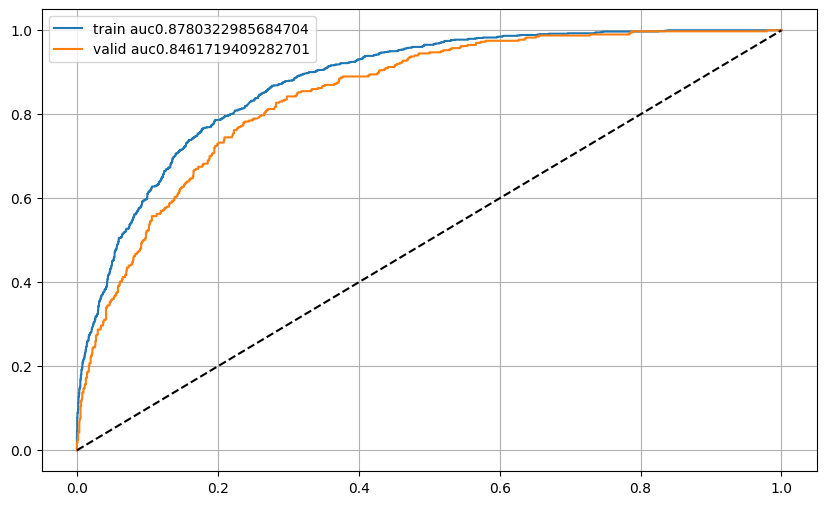

In [22]:
from sklearn.metrics import roc_curve

plt.figure(figsize=(10, 6))
plt.plot(*roc_curve(y_train, predict_proba_train_cb)[:2], label=f'train auc{roc_auc_train_cb}')
plt.plot(*roc_curve(y_valid, predict_proba_valid_cb)[:2], label=f'valid auc{roc_auc_valid_cb}')
plt.plot([0, 1], [0, 1], '--', color='black')

plt.grid()
plt.legend()
plt.show()

In [23]:
roc_auc_valid_cb, grid_search_cb.best_params_

(0.8461719409282701,
 {'catboost__iterations': 60, 'catboost__learning_rate': 0.05})

# Предсказания

In [24]:
best_model = grid_search_cb

In [25]:
X_test = pd.read_csv('/kaggle/input/userchurn/test.csv')
submission = pd.read_csv('/kaggle/input/userchurn/submission.csv')

submission['Churn'] = best_model.predict_proba(X_test)[:, 1]
submission

,Id,Churn
0,0,0.055912
1,1,0.596368
2,2,0.606763
3,3,0.028396
4,4,0.011810
...,...,...
1756,1756,0.150599
1757,1757,0.023213
1758,1758,0.799279
1759,1759,0.582101


In [26]:
submission.to_csv('/kaggle/working/my_submission.csv', index=False)